# Neural Networks Regression

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn
from keras.layers import InputLayer , Dense
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import make_scorer, r2_score, mean_squared_error
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [62]:
# import sys
# sys.version

In [63]:
# !pip list

In [43]:
#print(tf.__version__)

2.15.0


In [64]:
#pip install keras==3.3.3

In [65]:
#pip install tensorflow==2.16.1

In [73]:
#pip install scikeras[tensorflow]

In [2]:
data = pd.read_csv(r"C:\Users\lily\Desktop\IT alapok privát\PRIV DATA SC 1025\house 1030.csv")

data.dropna(inplace=True)

data.head()

,number_of_rooms,floor,area,latitude,longitude,price
0,1,1,58.0,38.585834,68.793715,330000
1,1,14,68.0,38.522254,68.749918,340000
3,3,14,84.0,38.520835,68.747908,700000
4,3,3,83.0,38.564374,68.739419,415000
5,3,4,53.0,38.530686,68.745261,513000


##### Split the data into training and testing parts

In [3]:
X = data.drop('price', axis=1)
y = data.price

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=0)

##### Build the Neural networks

In [66]:
X_train.shape

(2984, 5)

In [22]:
model_price = tf.keras.Sequential([ InputLayer(input_shape= 5),
                                Dense(64, input_dim=X_train.shape[1], activation='relu'),
                                Dense(32, activation = 'relu'),
                                Dense(1, activation='linear')
])


##### Compile the neural newtorks

In [23]:
model_price.compile(optimizer=Adam(learning_rate=0.01), loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])

##### Train the neural netrowks

In [24]:
model_price.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2) 

Epoch 1/100
239/239 [==============================] - 2s 3ms/step - loss: 252858613760.0000 - root_mean_squared_error: 502850.5000 - val_loss: 199062323200.0000 - val_root_mean_squared_error: 446164.0312
Epoch 2/100
239/239 [==============================] - 1s 2ms/step - loss: 117862359040.0000 - root_mean_squared_error: 343310.8750 - val_loss: 185075335168.0000 - val_root_mean_squared_error: 430203.8438
Epoch 3/100
239/239 [==============================] - 1s 2ms/step - loss: 106745012224.0000 - root_mean_squared_error: 326718.5625 - val_loss: 169084387328.0000 - val_root_mean_squared_error: 411198.7188
Epoch 4/100
239/239 [==============================] - 1s 2ms/step - loss: 98658877440.0000 - root_mean_squared_error: 314100.0938 - val_loss: 160628965376.0000 - val_root_mean_squared_error: 400785.4688
Epoch 5/100
239/239 [==============================] - 1s 3ms/step - loss: 95346032640.0000 - root_mean_squared_error: 308781.5312 - val_loss: 157878632448.0000 - val_root_mean_squa

##### Evaluate the neural networks

In [25]:
preds_price = model_price.predict(X_test)

24/24 [==============================] - 0s 2ms/step


In [26]:
r2_score(y_test, preds_price)

0.5491626340510236

In [27]:
mse_dl = mean_squared_error(y_test, preds_price)
rmse_dl = np.sqrt(mse_dl)
rmse_dl

218336.53240577286

##### Visualize the outputs

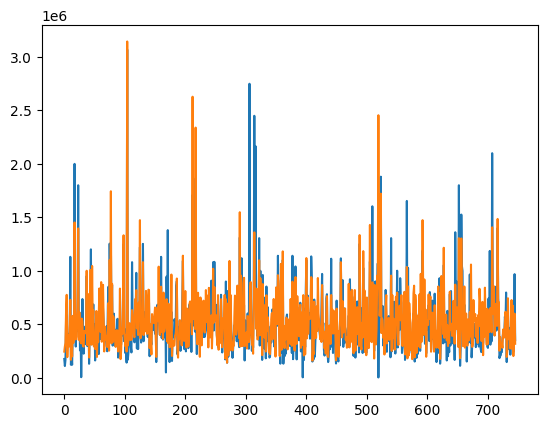

In [28]:
plt.plot([i for i in range(len(y_test))], y_test)
plt.plot([i for i in range(len(y_test))], preds_price)
plt.show()

##### Adding 3 hiden layers

In [87]:
model_price02 = tf.keras.Sequential([ InputLayer(input_shape= 5),
                                Dense(64, input_dim=X_train.shape[1], activation='relu'),
                                Dense(32, activation = 'relu'),
                                Dense(32, activation = 'relu'),
                                Dense(1, activation='linear')
])

In [88]:
model_price02.compile(optimizer=Adam(learning_rate=0.01), loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])


In [89]:
model_price02.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2) 

Epoch 1/100
239/239 [==============================] - 2s 4ms/step - loss: 193348321280.0000 - root_mean_squared_error: 439713.9062 - val_loss: 179068092416.0000 - val_root_mean_squared_error: 423164.3750
Epoch 2/100
239/239 [==============================] - 1s 3ms/step - loss: 100728848384.0000 - root_mean_squared_error: 317378.0938 - val_loss: 157053599744.0000 - val_root_mean_squared_error: 396299.9062
Epoch 3/100
239/239 [==============================] - 1s 3ms/step - loss: 94980055040.0000 - root_mean_squared_error: 308188.3438 - val_loss: 153524928512.0000 - val_root_mean_squared_error: 391822.5625
Epoch 4/100
239/239 [==============================] - 1s 3ms/step - loss: 94735024128.0000 - root_mean_squared_error: 307790.5625 - val_loss: 149554708480.0000 - val_root_mean_squared_error: 386723.0312
Epoch 5/100
239/239 [==============================] - 1s 3ms/step - loss: 95572942848.0000 - root_mean_squared_error: 309148.7500 - val_loss: 164961107968.0000 - val_root_mean_squar

In [90]:
preds_price02 = model_price02.predict(X_test)

24/24 [==============================] - 0s 2ms/step


In [91]:
r2_score(y_test, preds_price02)

0.5329189228418801

In [92]:
mse_dl = mean_squared_error(y_test, preds_price02)
rmse_dl = np.sqrt(mse_dl)
rmse_dl

222235.06951916625